Data Statistics for Interaction_Count:
Column Interaction_Count not found in the DataFrame.
Top Products Data:
+----------+-----------------+
|Product_ID|Interaction_Count|
+----------+-----------------+
|        50|             1165|
|        24|             1145|
|        47|             1129|
|        39|             1127|
|        28|             1118|
|         3|             1116|
|        41|             1114|
|        12|             1113|
|        11|             1110|
|        10|             1109|
+----------+-----------------+



<Figure size 1600x800 with 0 Axes>

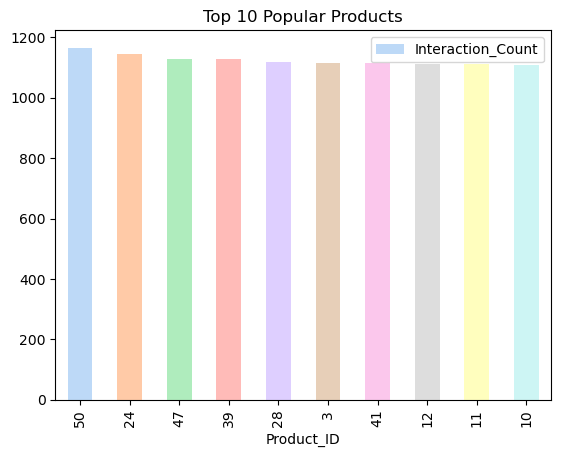

Data Statistics for User_ID:
+-------+------------------+
|summary|           User_ID|
+-------+------------------+
|  count|             54101|
|   mean| 50.59688360658768|
| stddev|28.900900674353355|
|    min|                 1|
|    max|               100|
+-------+------------------+

Interaction Type Data:
+----------------+-----+
|Interaction_Type|Count|
+----------------+-----+
|        purchase|17876|
|    product_view|18024|
|     add_to_cart|18201|
+----------------+-----+



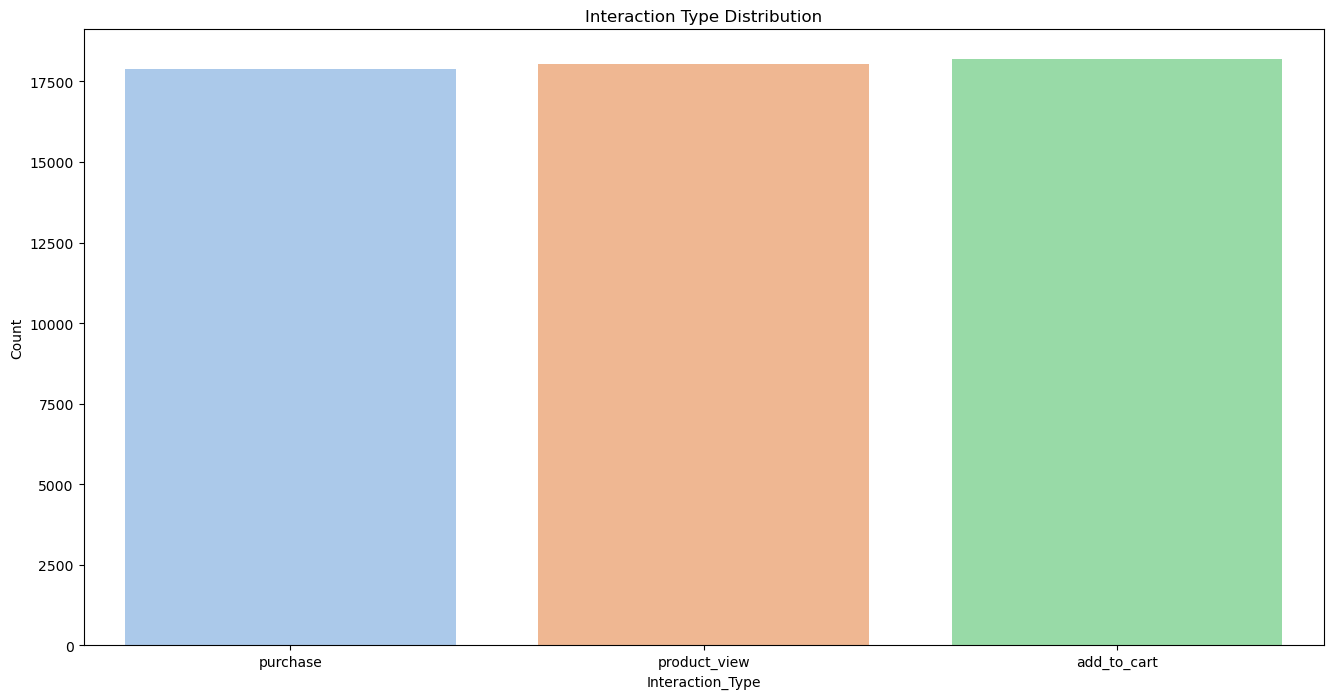

Data Statistics for User_ID:
+-------+------------------+
|summary|           User_ID|
+-------+------------------+
|  count|             54101|
|   mean| 50.59688360658768|
| stddev|28.900900674353355|
|    min|                 1|
|    max|               100|
+-------+------------------+

Daily Interaction Trend Data:


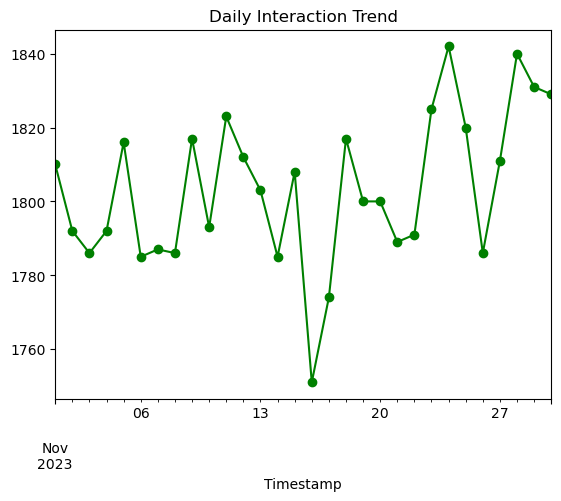

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import DataFrame

class UserInteractionsReport:
    def __init__(self, spark, file_path):
        self.spark = spark
        self.file_path = file_path

    def load_data(self) -> DataFrame:
        return self.spark.read.csv(self.file_path, header=True, inferSchema=True)

    def preprocess_data(self, data: DataFrame) -> DataFrame:
        # Additional handling for null, empty, hyphen, or negative Product_ID
        return data.withColumn('Product_ID', F.when((F.col('Product_ID').isNull()) | (F.col('Product_ID') == '') | (F.col('Product_ID') == '-') | (F.col('Product_ID') < 0), 0).otherwise(F.col('Product_ID')))

    def visualize_top_products(self, data: DataFrame):
        # Additional handling for null, empty, hyphen, or negative Product_ID
        data = data.filter((F.col('Product_ID') != 0))

        # Print data statistics
        self.print_data_stats(data, 'Interaction_Count')

        # Print table data
        print("Top Products Data:")
        top_products = (
            data
            .groupBy('Product_ID')
            .agg(F.count('User_ID').alias('Interaction_Count'))
            .orderBy('Interaction_Count', ascending=False)
            .limit(10)
        )
        top_products.show()

        # Visualize top products with different colors for each product
        plt.figure(figsize=(16, 8))
        top_products_pd = top_products.toPandas()
        colors = sns.color_palette('pastel', n_colors=len(top_products_pd))
        top_products_pd.plot(kind='bar', x='Product_ID', y='Interaction_Count', color=colors, alpha=0.7)
        plt.title('Top 10 Popular Products')
        plt.show()

    def visualize_interaction_type(self, data: DataFrame):
        # Additional handling for null, empty, hyphen, or negative Product_ID
        data = data.filter((F.col('Product_ID') != 0))

        # Print data statistics
        self.print_data_stats(data, 'User_ID')

        # Print table data
        print("Interaction Type Data:")
        interaction_type_counts = (
            data
            .groupBy('Interaction_Type')
            .agg(F.count('User_ID').alias('Count'))
        )
        interaction_type_counts.show()

        # Visualize interaction type distribution
        plt.figure(figsize=(16, 8))
        interaction_type_counts_pd = interaction_type_counts.toPandas()
        sns.barplot(x='Interaction_Type', y='Count', data=interaction_type_counts_pd, palette='pastel')
        plt.title('Interaction Type Distribution')
        plt.show()

    def visualize_daily_interaction_trend(self, data: DataFrame):
        # Additional handling for null, empty, hyphen, or negative Product_ID
        data = data.filter((F.col('Product_ID') != 0))

        # Print data statistics
        self.print_data_stats(data, 'User_ID')

        # Print table data
        print("Daily Interaction Trend Data:")
        data_pd = data.toPandas()
        data_pd['Timestamp'] = pd.to_datetime(data_pd['Timestamp'])
        data_pd.set_index('Timestamp')['User_ID'].resample('D').count().plot(kind='line', marker='o', color='green')
        plt.title('Daily Interaction Trend')
        plt.show()

    def print_data_stats(self, data: DataFrame, column: str):
        # Print data statistics
        print(f"Data Statistics for {column}:")

        # Check if the column exists in the DataFrame
        if column in data.columns:
            data.describe(column).show()
        else:
            print(f"Column {column} not found in the DataFrame.")


# Example of usage
spark = SparkSession.builder.appName("UserInteractionsJob").getOrCreate()
user_interactions_report = UserInteractionsReport(spark, '/home/raja/Documents/MS-DATA-SCIENCE/Fall-2023/Big-Data-Project/UserInteractions_data.csv')
user_interactions_data = user_interactions_report.load_data()
user_interactions_data = user_interactions_report.preprocess_data(user_interactions_data)

# Visualize each plot separately
user_interactions_report.visualize_top_products(user_interactions_data)
user_interactions_report.visualize_interaction_type(user_interactions_data)
user_interactions_report.visualize_daily_interaction_trend(user_interactions_data)
